Brave search: simple gradient tape model<br>
https://www.linkedin.com/pulse/gradient-tape-deploy-descent-tensorflow-vu-hong-quan<br>
https://github.com/quanvu0996/data_science/blob/main/tf/gradient_tape1_en.ipynb

In [177]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.15.0'

In [178]:
a = tf.constant(1)
b = tf.constant([3, 5])
c = tf.ones(shape=(3,5))

print(a)
print(b)
print(c)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([3 5], shape=(2,), dtype=int32)
tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(3, 5), dtype=float32)


In [179]:
X = tf.Variable(initial_value= tf.zeros((2, 2)), trainable= True)
X

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [180]:
x = tf.constant(5.0)
 
with tf.GradientTape() as tape:
    tape.watch(x) # while x is not a tf.Variable => we need to set the tape watch it, or else the derivative will be 0.
                  # if x is a tf.Variable then watch is no need
    y = x ** 2
dy_dx = tape.gradient(y, x)
print(dy_dx)
del tape

tf.Tensor(10.0, shape=(), dtype=float32)


$y=x^2$

$\frac{dy}{dx}=2x$

$\frac{d^2y}{dx^2}=2$


In [181]:
x = tf.constant(6.0)

with tf.GradientTape() as t2:
    t2.watch(x)
    with tf.GradientTape() as t:
        t.watch(x)
        y = x ** 2
    dy_dx = t.gradient(y, x)
    print(dy_dx)
d2y_dx = t2.gradient(dy_dx, x)
print(d2y_dx)

del t, t2

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [182]:
def make_plot(number):
    #add points to plot
    plt.scatter(X, Y, color='purple')

    #add line of best fit to plot
    plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

    ptext = "y=%0.2f*x+%0.2f" % (a,b)
    print(ptext)
    #add fitted regression equation to plot
    # plt.text(1, 17, ptext, size=14)
    plt.text(1, 1.75, ptext)

    # plt.close()


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.116900004>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.023920001>


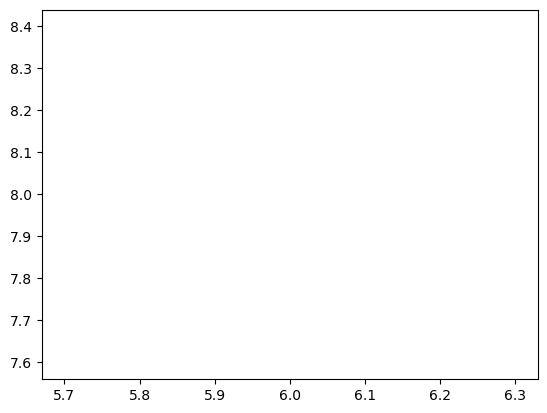

In [183]:

# Define model parameters as trainable variables
a = tf.Variable(initial_value=0.0, trainable=True)
b = tf.Variable(initial_value=0.0, trainable=True)

# Define training data (X, Y)
X = tf.constant([1., 4., 6, 3, 3, 4, 5, 6, 7])
Y = tf.constant([0.25, 1.2, 0.79, 0.52, 1.6, 1.7, 1.9, 2, 2])


# make_plot(0)


# Define the loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

# Define the learning rate
learning_rate = 0.001
 
with tf.GradientTape(persistent =True) as tape:
    # Find prediction value and calculate loss value
    y_pred = a*X+b
    loss = loss_fn(Y, y_pred)
 
# Calculate partial derivative by each parameter
a_gradient = tape.gradient(loss, a)
b_gradient = tape.gradient(loss, b)
 
# update value of each parameter: w1 = w0 - learning_rate * d(loss)/dw
a.assign_sub(a_gradient*learning_rate)
b.assign_sub(b_gradient*learning_rate)
 
print(a)
print(b)
# plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
plt.plot(x, 1*x+2, color='steelblue', linestyle='--', linewidth=2)

# make_plot(1)

del tape

Epoch:  0
y=0.12*x+0.02
Loss:  8.134604
model: Y= 0.18587564 X + 0.038291242
Epoch:  1
y=0.19*x+0.04
Loss:  4.186867
model: Y= 0.22655392 X + 0.0470237
Epoch:  2
y=0.23*x+0.05
Loss:  2.8102624
model: Y= 0.25052384 X + 0.052426066
Epoch:  3
y=0.25*x+0.05
Loss:  2.330071
model: Y= 0.2646282 X + 0.055861536
Epoch:  4
y=0.26*x+0.06
Loss:  2.1624107
model: Y= 0.2729075 X + 0.05813503


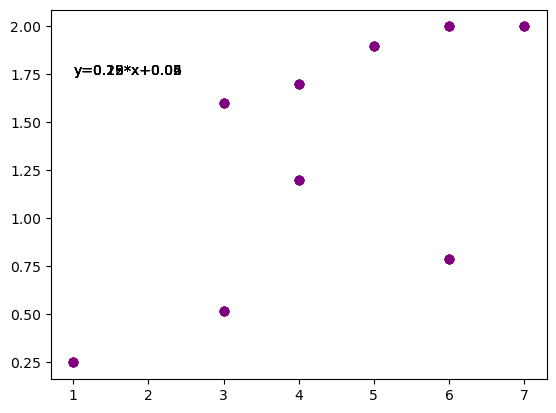

In [184]:
def train_step(x_true, y_true):
    with tf.GradientTape(persistent =True) as tape:
        # Find prediction value and calculate loss value
        y_pred = a*X+b
        loss = loss_fn(Y, y_pred)
        print("Loss: ", loss.numpy())
 
    # calculate partial gradient by each parameter
    a_gradient = tape.gradient(loss, a)
    b_gradient = tape.gradient(loss, b)
 
    # update value of each parameter: w1 = w0 - learning_rate * d(loss)/dw
    a.assign_sub(a_gradient*learning_rate)
    b.assign_sub(b_gradient*learning_rate)
    print("model: Y= %s X + %s"%(a.numpy(), b.numpy()))

for i in range(5):
    print("Epoch: ", i)
    make_plot(i)
    train_step(X, Y)

Text(1, 17, 'y = -0.89 + 2.31x')

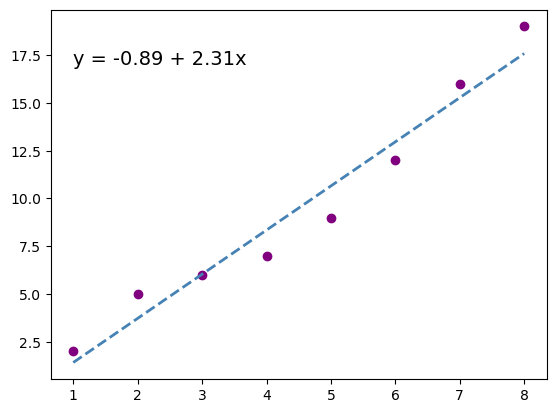

In [186]:
import numpy as np
import matplotlib.pyplot as plt

#define data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([2, 5, 6, 7, 9, 12, 16, 19])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)